# 8. 범주형 데이터 분석
## 8.1 범주형 데이터 분석 기초
### 1. 카이제곱 검정 개요
* 카이제곱 검정은 카이제곱 분포에 기초한 통계적 분석 방법으로 관측된 도수(빈도)가 기대되는 도수(빈도)와 통계적으로 유의미하게 다른지 검정하는 방법
* 크게 적합도 검정, 독립성 검정, 동질성 검정 3가지로 분류

카이제곱 검정 종류|분석 목적
---|---
적합도 검정|관측결과가 특정한 분포로부터의 생성된 관측 값인지를 검정(예: 직업 유형과 선호 상품이 서로 관계가 있는지 검정)
독립성 검정|두 범주형 변수 사이의 연관성이 있는지를 검정(예: 직업 유형과 선호 상품이 서로 관계가 있는지 검정)
동질성 검정|다른 두 모집단으로부터 생성된 두 표본의 분포가 동일한지 검정(예: 서울과 부산지역 고객들의 선호 품목이 유사한지 검정)

## 8.2 적합도 검정
### 1. 적합도 검정 주요 이론
* 귀무가설에서 제시한 각 범주의 비율이 실제 자료에 적합한지를 알아보는 검정 방법
* 데이터가 여러 개의 범주에 대한 관측도수 형태로 주어지는 문제를 다룰 때 사용함.
* 빈도교차표에 의한 비율검정을 기반으로 함.

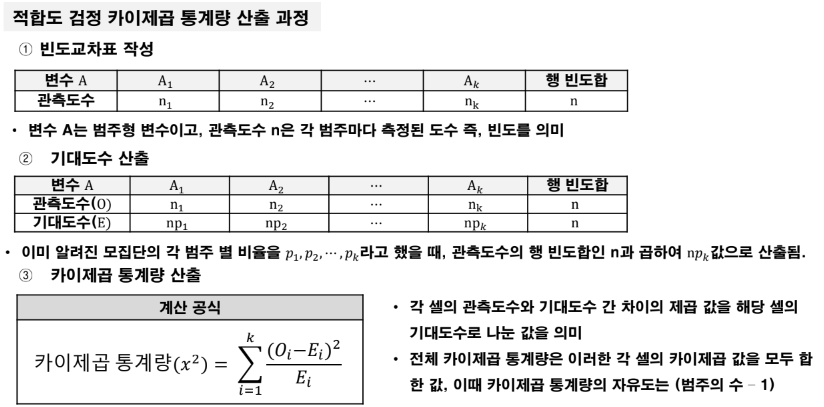

### 2. 적합도 검정 분석지표
* 적합도 검정의 카이제곱 검정을 수행할 경우 결과 해석을 위해 확인해야 할 지표는 카이제곱 통계량과 자유도 p-value 등이 있음

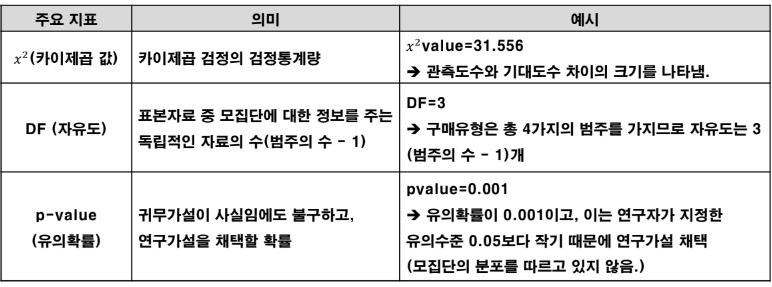

### 적합도 검정 분석 실습
A쇼핑은 클레임 고객들의 구매 패턴이 어떻게 다른지 파악하고자 클레임 고객들의 구매유형 별 비율의 적합도 검정을 시행하고자 한다. 기존에 알려진 A쇼핑의 클레임고객들의 구매 유형별 비율은 1회성 구매형 고객 10%, 실용적 구매형 30%, 명품 구매형 20%, 그리고 집중 구매형 40%로 알려져 있었다. 고객 구매유형과 클레임 접수 여ㅕ부에 대한 코드는 다음과 같다.

구매 유형|구분
---|---
1회성 구매형|1
실용적 구매형|2
명품 구매형|3
집중 구매형|4

클레임 접수 여부|구분
---|---
접수 하지 않았음|0
접수 경험 있음|1

H0 = 클레임 접수 고객의 구매유형별 비율은 1회성 구매형 10%, 실용적 구매 30%, 명품 구매형 20%, 집중 구매형 40%이다.

H1 = 클레임 접수 고객의 구매유형별 비율은 1회성 구매형 10%, 실용적 구매 30%, 명품 구매형 20%, 집중 구매형 40%가 아니다.

In [13]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

# 빈도교차표 생성하기
X = pd.crosstab(df.클레임접수여부, df.구매유형, margins=True)
X

구매유형,1,2,3,4,All
클레임접수여부,,,,,
0,24,197,57,263,541
1,19,120,87,233,459
All,43,317,144,496,1000


In [14]:
# 관측도수, 기대도수 추출하기
Ob = X.values[1, :4]
Pr = np.array([0.1, 0.2, 0.3, 0.4])
n = X.values[1, 4]
E = n * Pr

# 카이제곱 적합도 검정하기
stats.chisquare(Ob, E)

Power_divergenceResult(statistic=56.38671023965139, pvalue=3.473895901324991e-12)

### 결과 해석
* 카이제곱 통계량: 56.38, p-value: 0.01 이하로 도출됨
* 유의수준 99%에서 귀무가설 기각, 연구가설 채택. 즉 구매유형별 클레임 접수여부는 1회성 구매형 10%, 실용적 구매형 30%, 명품 구매형 20%, 집중구매형 40%라는 과거의 분포를 따르고 있다고 하지 않다고 할 수 있음.

## 8.3 독립성 검정
### 1. 독립성 검정 주요 이론
* 두 개의 범주형 변수간에 서로 연관성이 있는지, 독립적인지를 카이제곱 검정을 통해 통계적으로 판단하는 방법
* 적합도 검정과 마찬가지로 빈도교차표를 만들어서 카이제곱 검정을 하게 되는데 기대도수를 계산하는 방식에서 차이가 있음

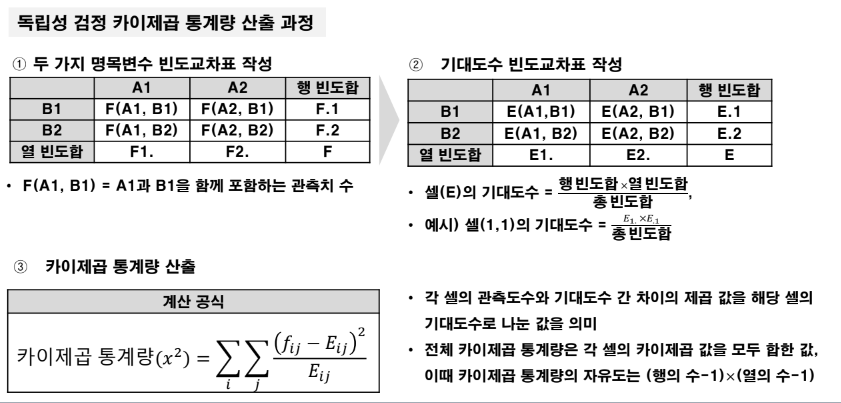

### 2. 독립성 검정 분석지표
* 독립성 검정의 카이제곱 검정을 수행할 경우 결과 해석을 위해 확인해야 할 지표는 카이제곱 통계량과 자유도 p-value등이 있음

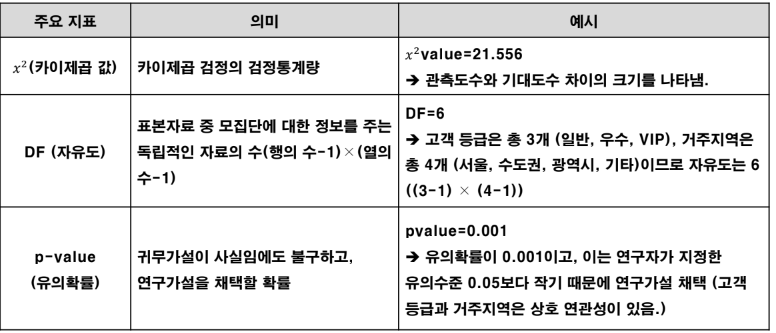

### 독립성 검정 분석 실습
A쇼핑은 이번에 클레임을 제기하는 고객은 성별과 무관하지 않을 것 같다는 전제를 가지고 클레임 접수여부와 성별간의 독립성 검정을 수행해보고자 한다. 성별과 클레임 접수여부에 대한 코드는 다음과 같다.

클레임 접수 여부|구분|성별|구분
---|---|---|---
접수 하지 않음|0|남성|0
접수 경험 있음|1|여성|1

H0 = 클레임 접수 여부와 성별은 연관성이 없다.

H1 = 클레임 접수 여부와 성별은 연관성이 있다.

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

# 빈도교차표 생성하기
X = pd.crosstab(df.성별, df.클레임접수여부, margins=False)

# 카이제곱 독립성 검정하기
stats.chi2_contingency(X)

Chi2ContingencyResult(statistic=106.43790651350751, pvalue=5.911607287197053e-25, dof=1, expected_freq=array([[ 80.609,  68.391],
       [460.391, 390.609]]))

### 결과 해석
* 카이제곱 통계량 = 106.437, 유의확률 <= 0.01, 자유도 = 1
* 귀무가설 기각, 연구가설 채택

## 8.4 동질성 검정
### 1. 동질성 검정 개요 및 분석지표
* 서로 다른 모집단에서 독립적으로 추출한 표본들의 범주별 비율이 서로 동질적인 것인지 검정하는 분석방법
* 기본적으로 독립성 검정과 기술적인 분석방법은 완전히 동일함.
* 단, 독립성 검정은 하나의 표본에서 검정하는 것이라면, 동질성 검정은 서로 다른 독립적인 표본에서 검정하는 것.

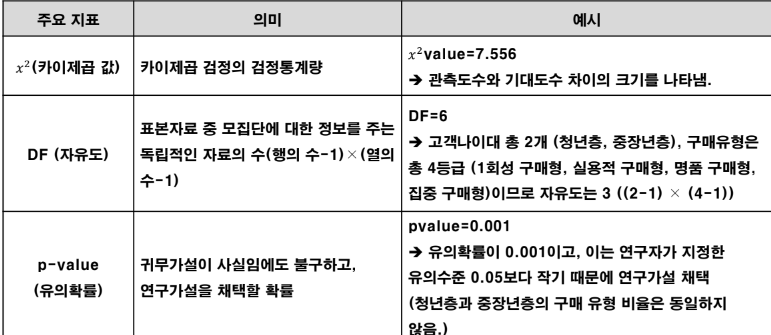

### 동질성 검정 분석 실습
A쇼핑은 자사가 관리하는 구매유형 4가지의 비율이 청년층 그룹과 중장년층 그룹에 따라 동질적인지 검토하여 연령대별 마케팅 전략에 활용하고자 한다. 이를 위해 고객 연령 그룹에 대한 구매유형 비율의 동질성 검정을 실시해보자. A쇼핑에서 사용하는 고객 구매유형과 고객 나이대에 대한 코드는 아래 표와 같다. 고객 연령대는 총 9개의 세부 그룹으로 분류하여 두 개의 다른 모집단에서 추출한 표본이라고 간주하고 실습을 진행해보자.

고객 나이대|구분
---|---
19세 이하|1
20\~24세|2
25\~29세|3
30\~34세|4
35\~39세|5
40\~44세|6
45\~49세|7
50\~55세|8
55세 이상|9

구매유형|구분
---|---
1회성 구매형|1
실용적 구매형|2
명품 구매형|3
집중 구매형|4

* H0 = 청년층과 중장년층의 구매 유형 비율은 동일하다.
* H1 = 청년층과 중장년층의 구매 유형 비율은 동일하지 않다.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

# 청년층, 중장년층 전처리
df['고객연령대'] = ''
df.고객연령대[df.고객_나이대==1] = '1'
df.고객연령대[df.고객_나이대==2] = '1'
df.고객연령대[df.고객_나이대==3] = '1'
df.고객연령대[df.고객_나이대==4] = '1'
df.고객연령대[df.고객_나이대==5] = '1'
df.고객연령대[df.고객_나이대==6] = '2'
df.고객연령대[df.고객_나이대==7] = '2'
df.고객연령대[df.고객_나이대==8] = '2'
df.고객연령대[df.고객_나이대==9] = '2'

# 두 모집단 랜덤표본추출
df1 = df.loc[df.고객연령대=='1']
df2 = df.loc[df.고객연령대=='2']
df1_sample = df1.sample(200, random_state=29)
df2_sample = df2.sample(200, random_state=29)
#df3 = df1_sample.append(df2_sample)
df3 = pd.concat([df1_sample, df2_sample])

# 빈도교차표 생성하기
X = pd.crosstab(df3.고객연령대, df3.구매유형, margins=False)

# 카이제곱 동질성 검사하기
stats.chi2_contingency(X)

C:\Users\sdh05\AppData\Local\Temp\ipykernel_8572\687382778.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.고객연령대[df.고객_나이대==1] = '1'
C:\Users\sdh05\AppData\Local\Temp\ipykernel_8572\687382778.py:8: SettingWithCopyWarning: 
A value is 

Chi2ContingencyResult(statistic=8.714970024248375, pvalue=0.033330661685866646, dof=3, expected_freq=array([[ 9., 66., 28., 97.],
       [ 9., 66., 28., 97.]]))

### 결과 해석
* 카이제곱 통계량 = 8.71, pvalue = 0.03
* 유의수준 95%에서 귀무가설 기각 -> A쇼핑 고객들의 청년층과 중장년층의 구매 유형 분포는 동질적이지 않다.